<a href="https://colab.research.google.com/github/Lavanya-Srinivas214/NND/blob/main/RGB_TO_Grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.2038
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0548
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0386
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0299
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0209
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


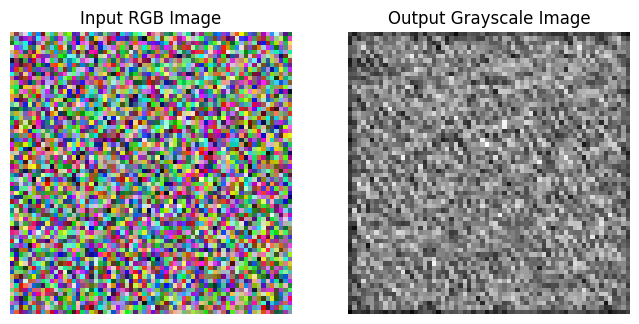

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import numpy as np
import matplotlib.pyplot as plt
# Create Dataset
X_rgb = np.random.rand(100, 64, 64, 3)
Y_gray = np.dot(X_rgb[..., :3], [0.299, 0.587, 0.114])
Y_gray = Y_gray.reshape(100, 64, 64, 1)
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same',
           input_shape=(64,64,3)),
    Conv2D(16, (3,3), activation='relu', padding='same'),
    Conv2D(1, (3,3), activation='linear', padding='same')
])
# Compile Model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
# Train Model
model.fit(X_rgb, Y_gray, epochs=5, batch_size=8, verbose=1)
# Test Image
test_image = np.random.rand(1, 64, 64, 3)
predicted_gray = model.predict(test_image)
# Display Input RGB & Output Grayscale
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Input RGB Image")
plt.imshow(test_image[0])
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Output Grayscale Image")
plt.imshow(predicted_gray[0].reshape(64,64), cmap='gray')
plt.axis("off")
plt.show()
